# **Importing Libraries**


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Problem Statement 

*You have been given a Dataset that describes the functionality of houses. 
Now, based on the given features you have to predict the house price




# **Defining The Data Frame**

In [2]:
df = pd.read_csv('/content/Housing.csv')

## **EDA**

In [3]:
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
df.shape[0] #For Rows

545

In [6]:
df.shape[1] #For Columns

13

In [7]:
len(df.columns)

13

In [8]:
df.columns #Print All the Columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [11]:
df.nunique

<bound method DataFrame.nunique of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no      

In [12]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [13]:
df.isnull().sum() # Find number of null values in each columns

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [14]:
df.isnull().sum().sum() #Find Total Numeber of null values in Entire Dataset

0

In [15]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [16]:
df.mainroad.unique()

array(['yes', 'no'], dtype=object)

In [17]:
df.mainroad.value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [41]:
newdf = df.copy()

In [42]:
newdf.mainroad.replace(['yes','no'],[1,0])

0      1
1      1
2      1
3      1
4      1
      ..
540    1
541    0
542    1
543    0
544    1
Name: mainroad, Length: 545, dtype: int64

In [43]:
newdf.mainroad.replace(['yes','no'],[1,0]).value_counts()

1    468
0     77
Name: mainroad, dtype: int64

In [44]:
newdf.mainroad.replace(['yes','no'],[1,0] ,inplace=True)

In [22]:
df.mainroad.replace(['yes','no'],[1,0] ,inplace=True)

In [45]:
newdf.mainroad.dtypes

dtype('int64')

In [46]:
newdf.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [25]:
df.guestroom.value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [26]:
df.guestroom.unique()

array(['no', 'yes'], dtype=object)

In [27]:
df.guestroom.replace(['yes','no'],[1,0] ,inplace=True) #guestroom

In [28]:
df.basement.unique()

array(['no', 'yes'], dtype=object)

In [29]:
df.basement.value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [30]:
df.basement.replace(['yes','no'],[1,0] ,inplace=True) #basement

In [31]:
df.hotwaterheating.replace(['yes','no'],[1,0] ,inplace=True) #hotwaterheating

In [32]:
df.airconditioning.replace(['yes','no'],[1,0] ,inplace=True) #airconditioning

In [33]:
df.prefarea.replace(['yes','no'],[1,0] ,inplace=True) #prefarea


In [34]:
df.head()




,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [35]:
df.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [36]:
df.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [37]:
df.furnishingstatus.replace(['furnished','unfurnished','semi-furnished'],[1,0,2] ,inplace=True) #furnishingstatus


In [38]:
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


**Observations**

Data Strength = 545


Number of Random Variables = 13

None of the column contains Null Values

Columns = price,bedrooms,bathrooms,area,stories,parking  has numerical value

columns = mainroad,guestroom,basement,hotwaterheating,airconditioning ,prefarea,furnishingstatus has object values

#**Manipulation**  


    Changed the categorical values to numerical values for the columns(mainroad,guestroom,basement,hotwaterheating,airconditioning ,prefarea,furnishingstatus)

In [39]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.089908
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.858130
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [47]:
newdf.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.089908
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.858130
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [48]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.190086
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.081367
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.097834
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.089418
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.043288
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.079403
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.057513
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.093425
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.069076
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.020887


In [49]:
newdf.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.190086
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.081367
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.097834
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.089418
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.043288
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.079403
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.057513
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.093425
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.069076
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.020887


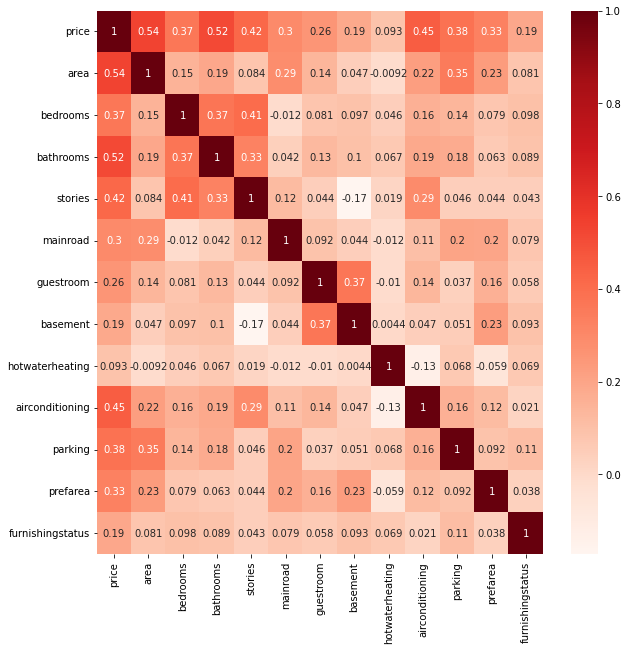

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Reds')

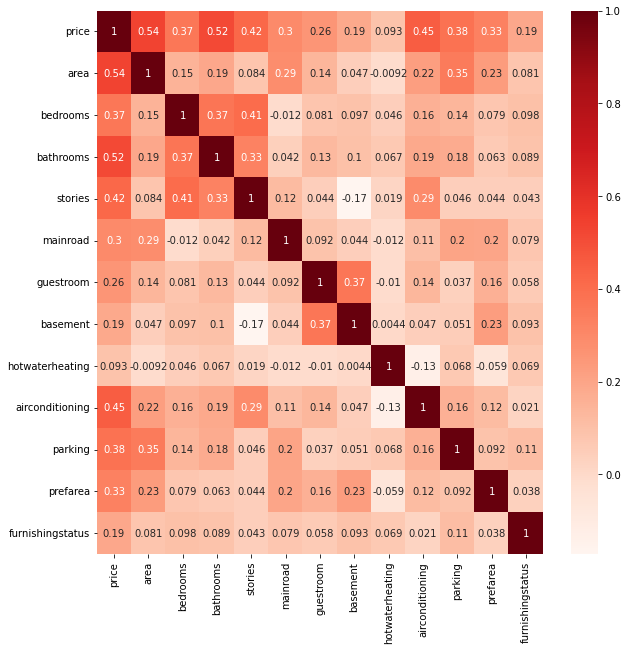

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(newdf.corr(), annot=True, cmap='Reds')

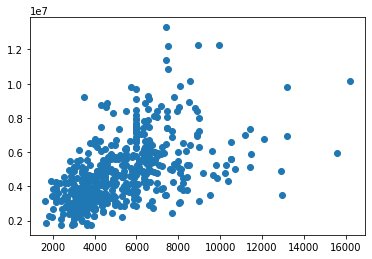

In [52]:
plt.scatter(df.area , df.price)

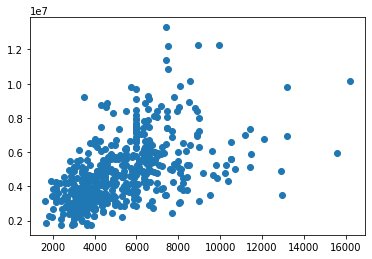

In [53]:
plt.scatter(newdf.area , newdf.price)

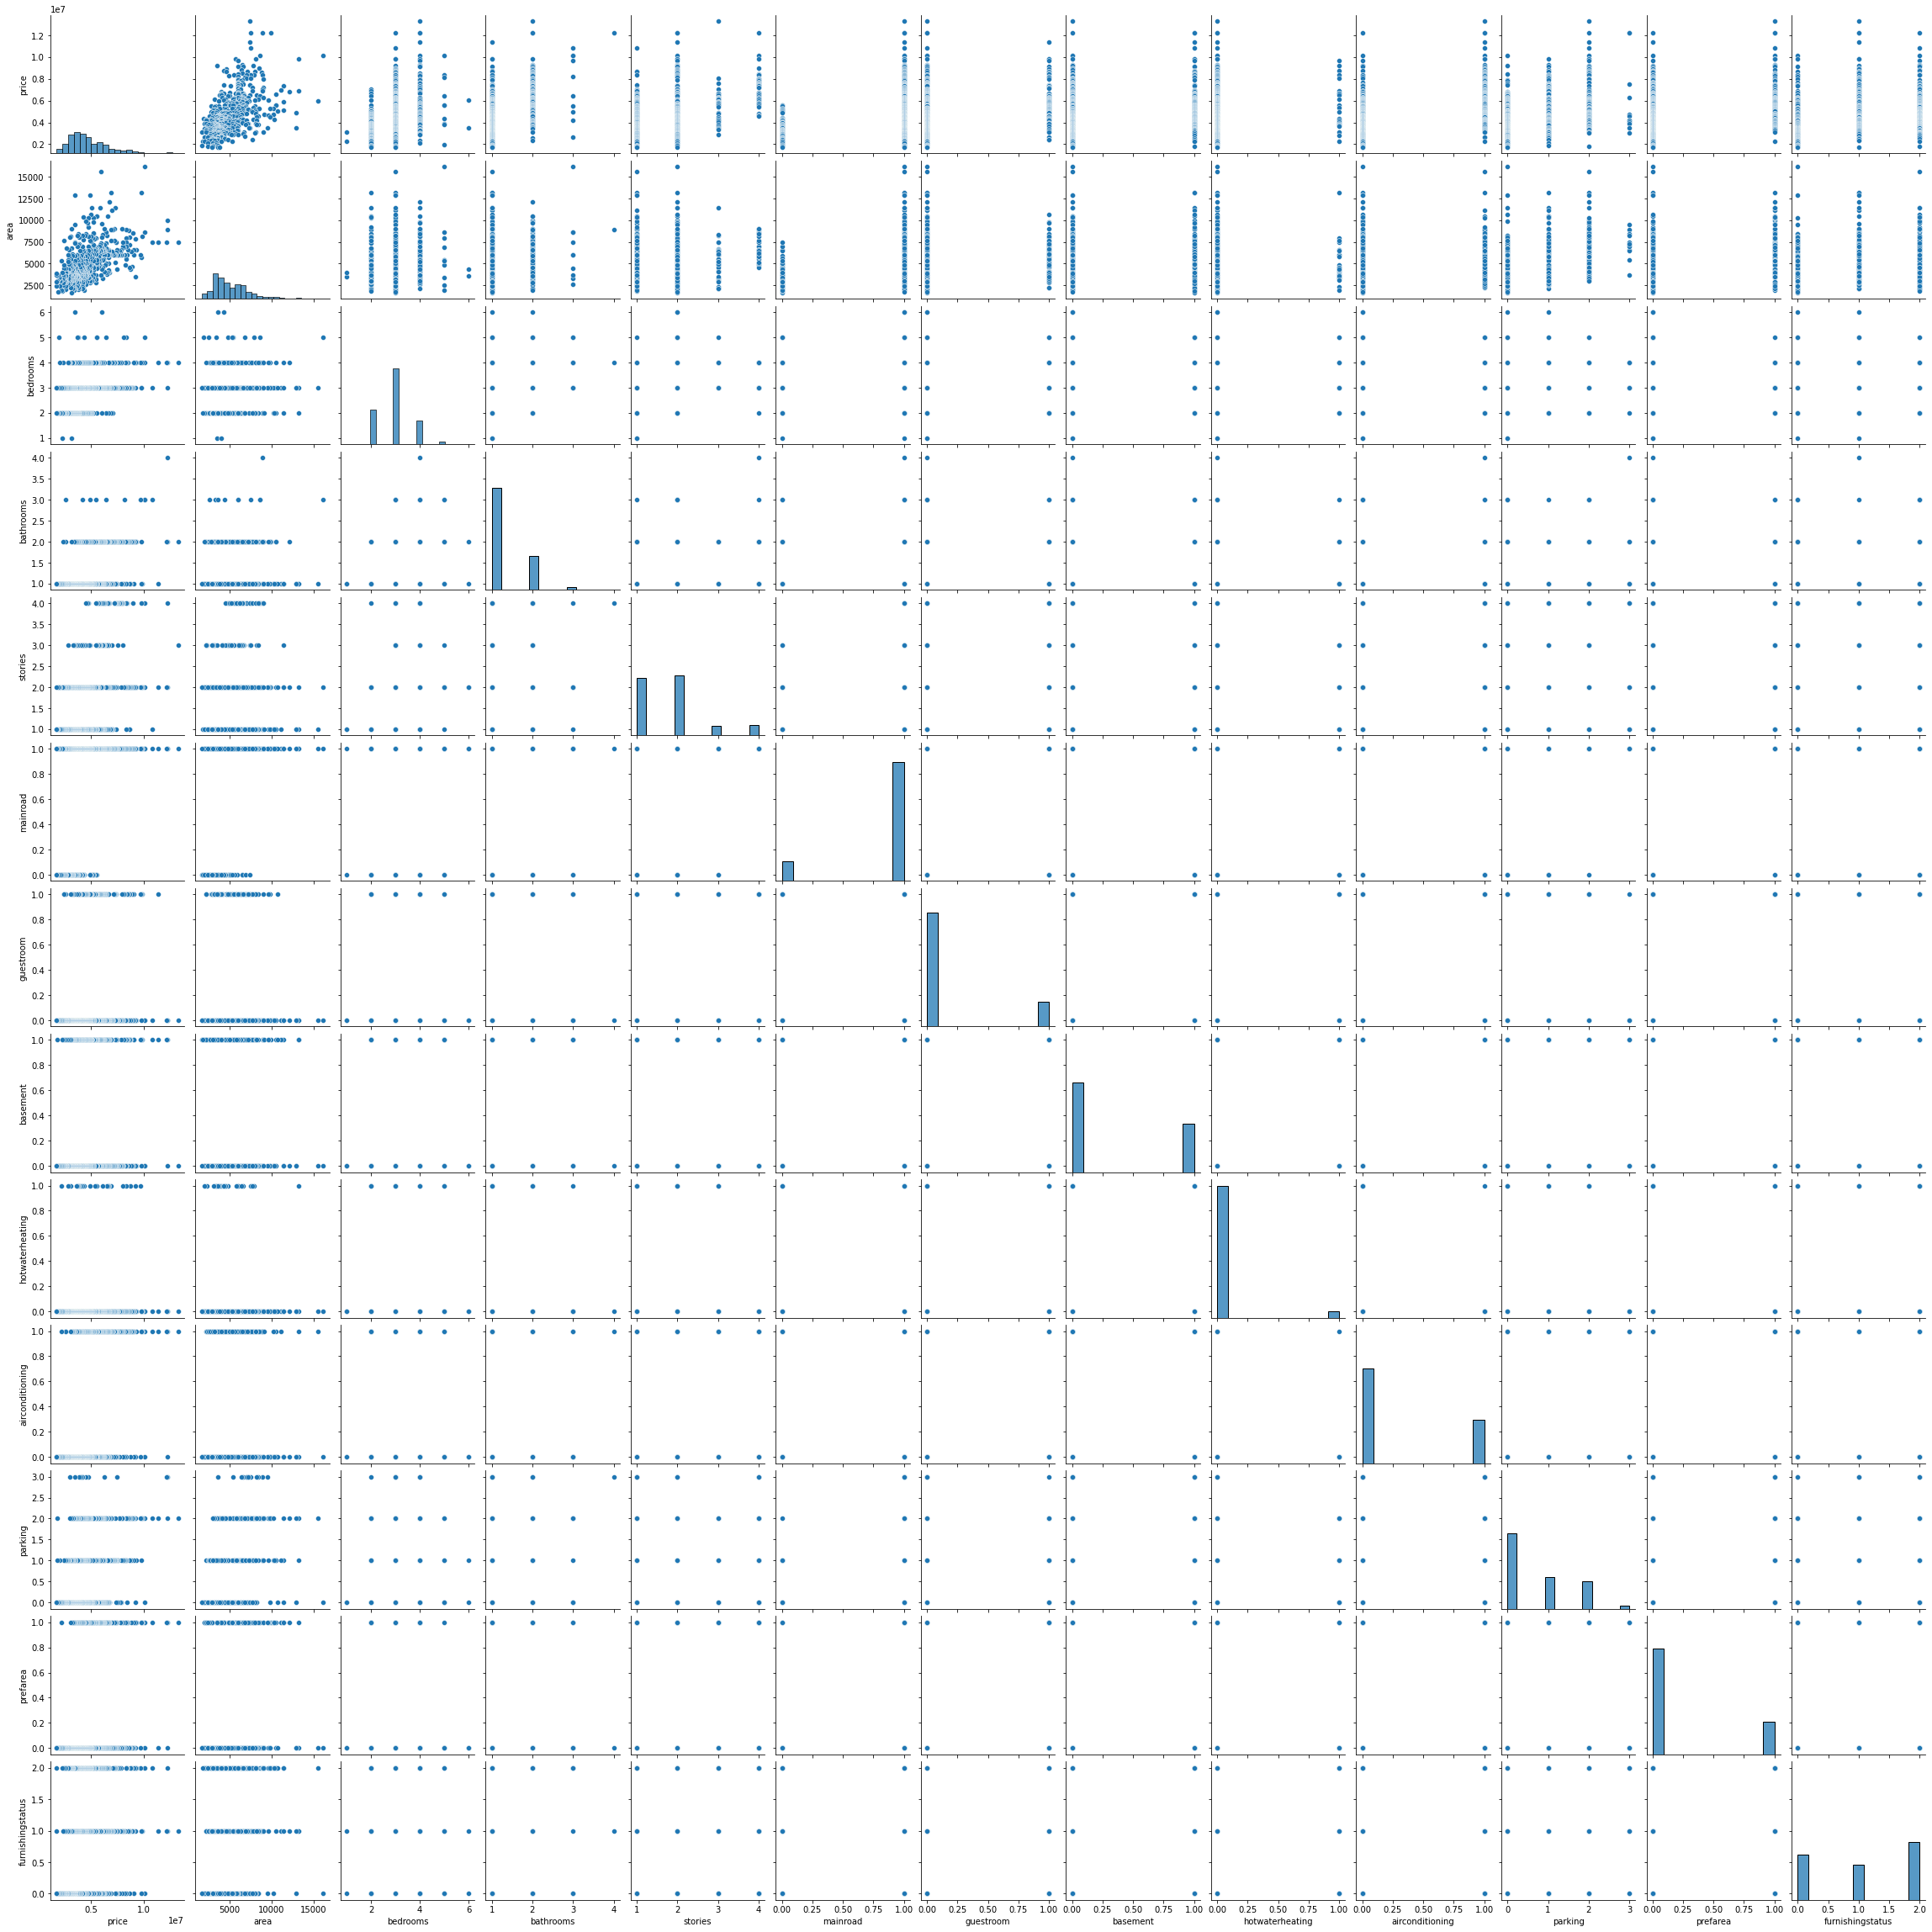

In [54]:
sns.pairplot(df)

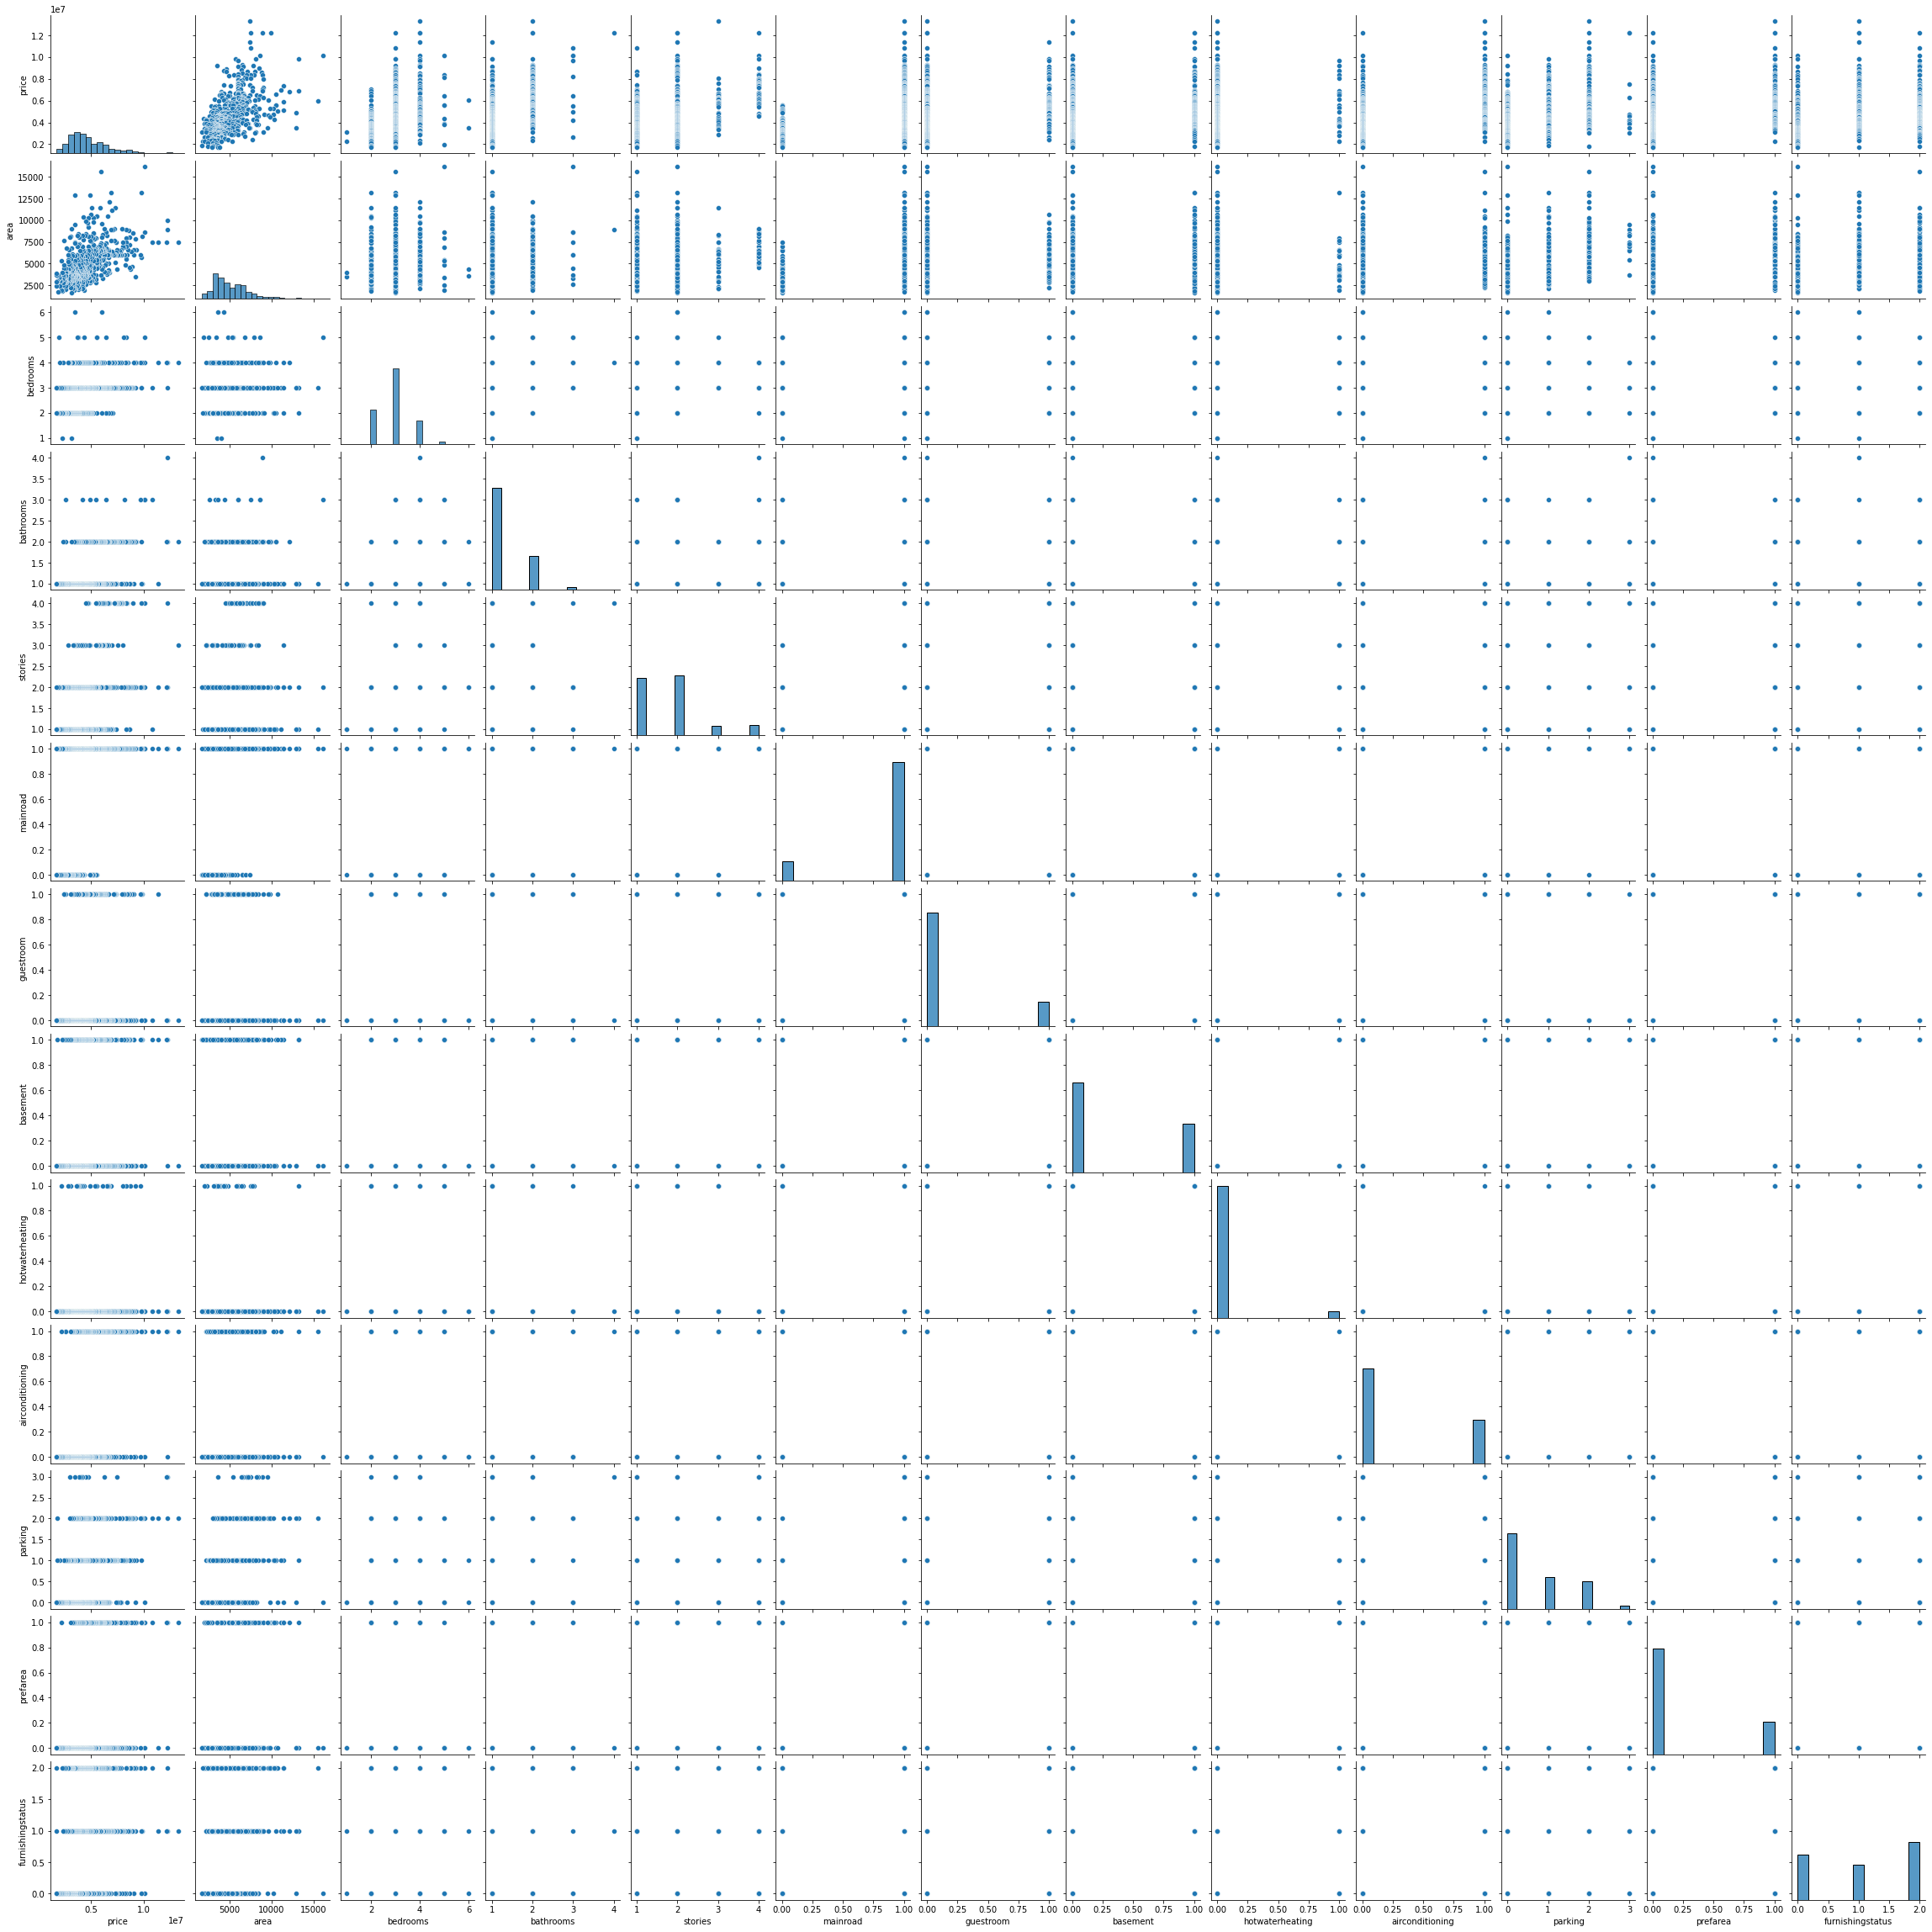

In [55]:
sns.pairplot(newdf)

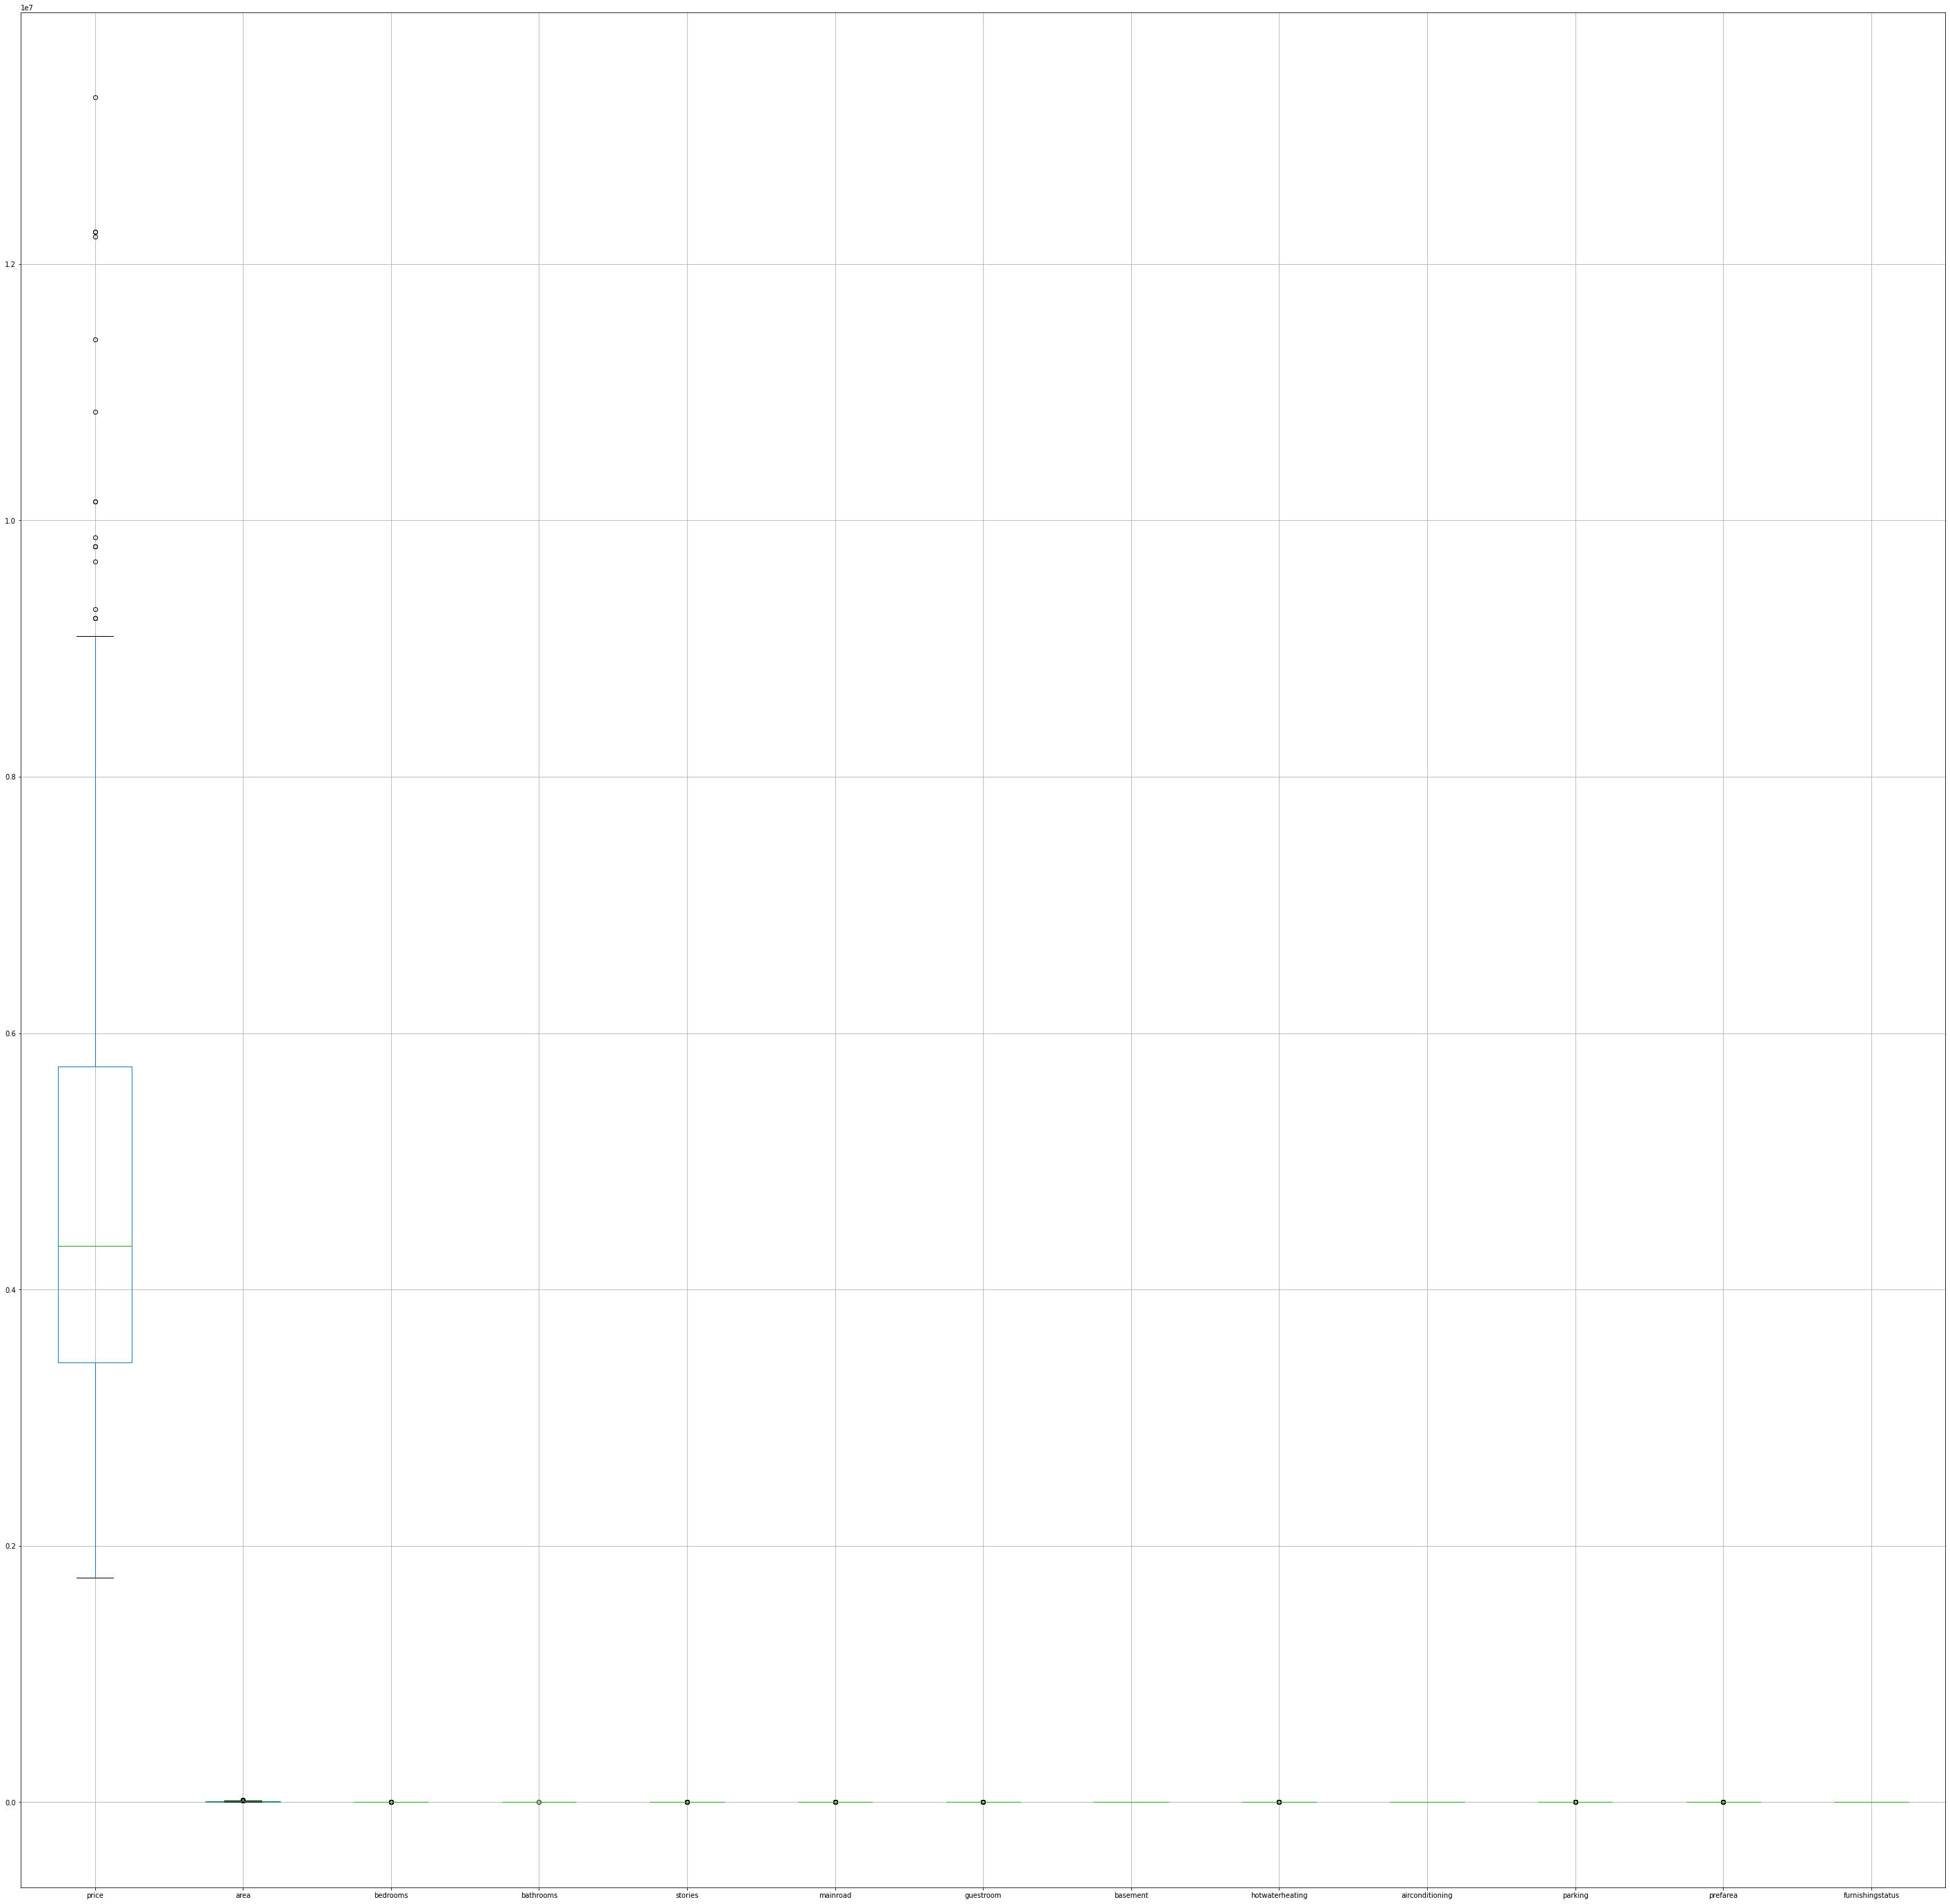

In [56]:
plt.figure(figsize=(50,50))
df.boxplot()

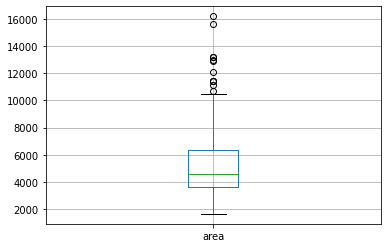

In [57]:
df[['area']].boxplot()

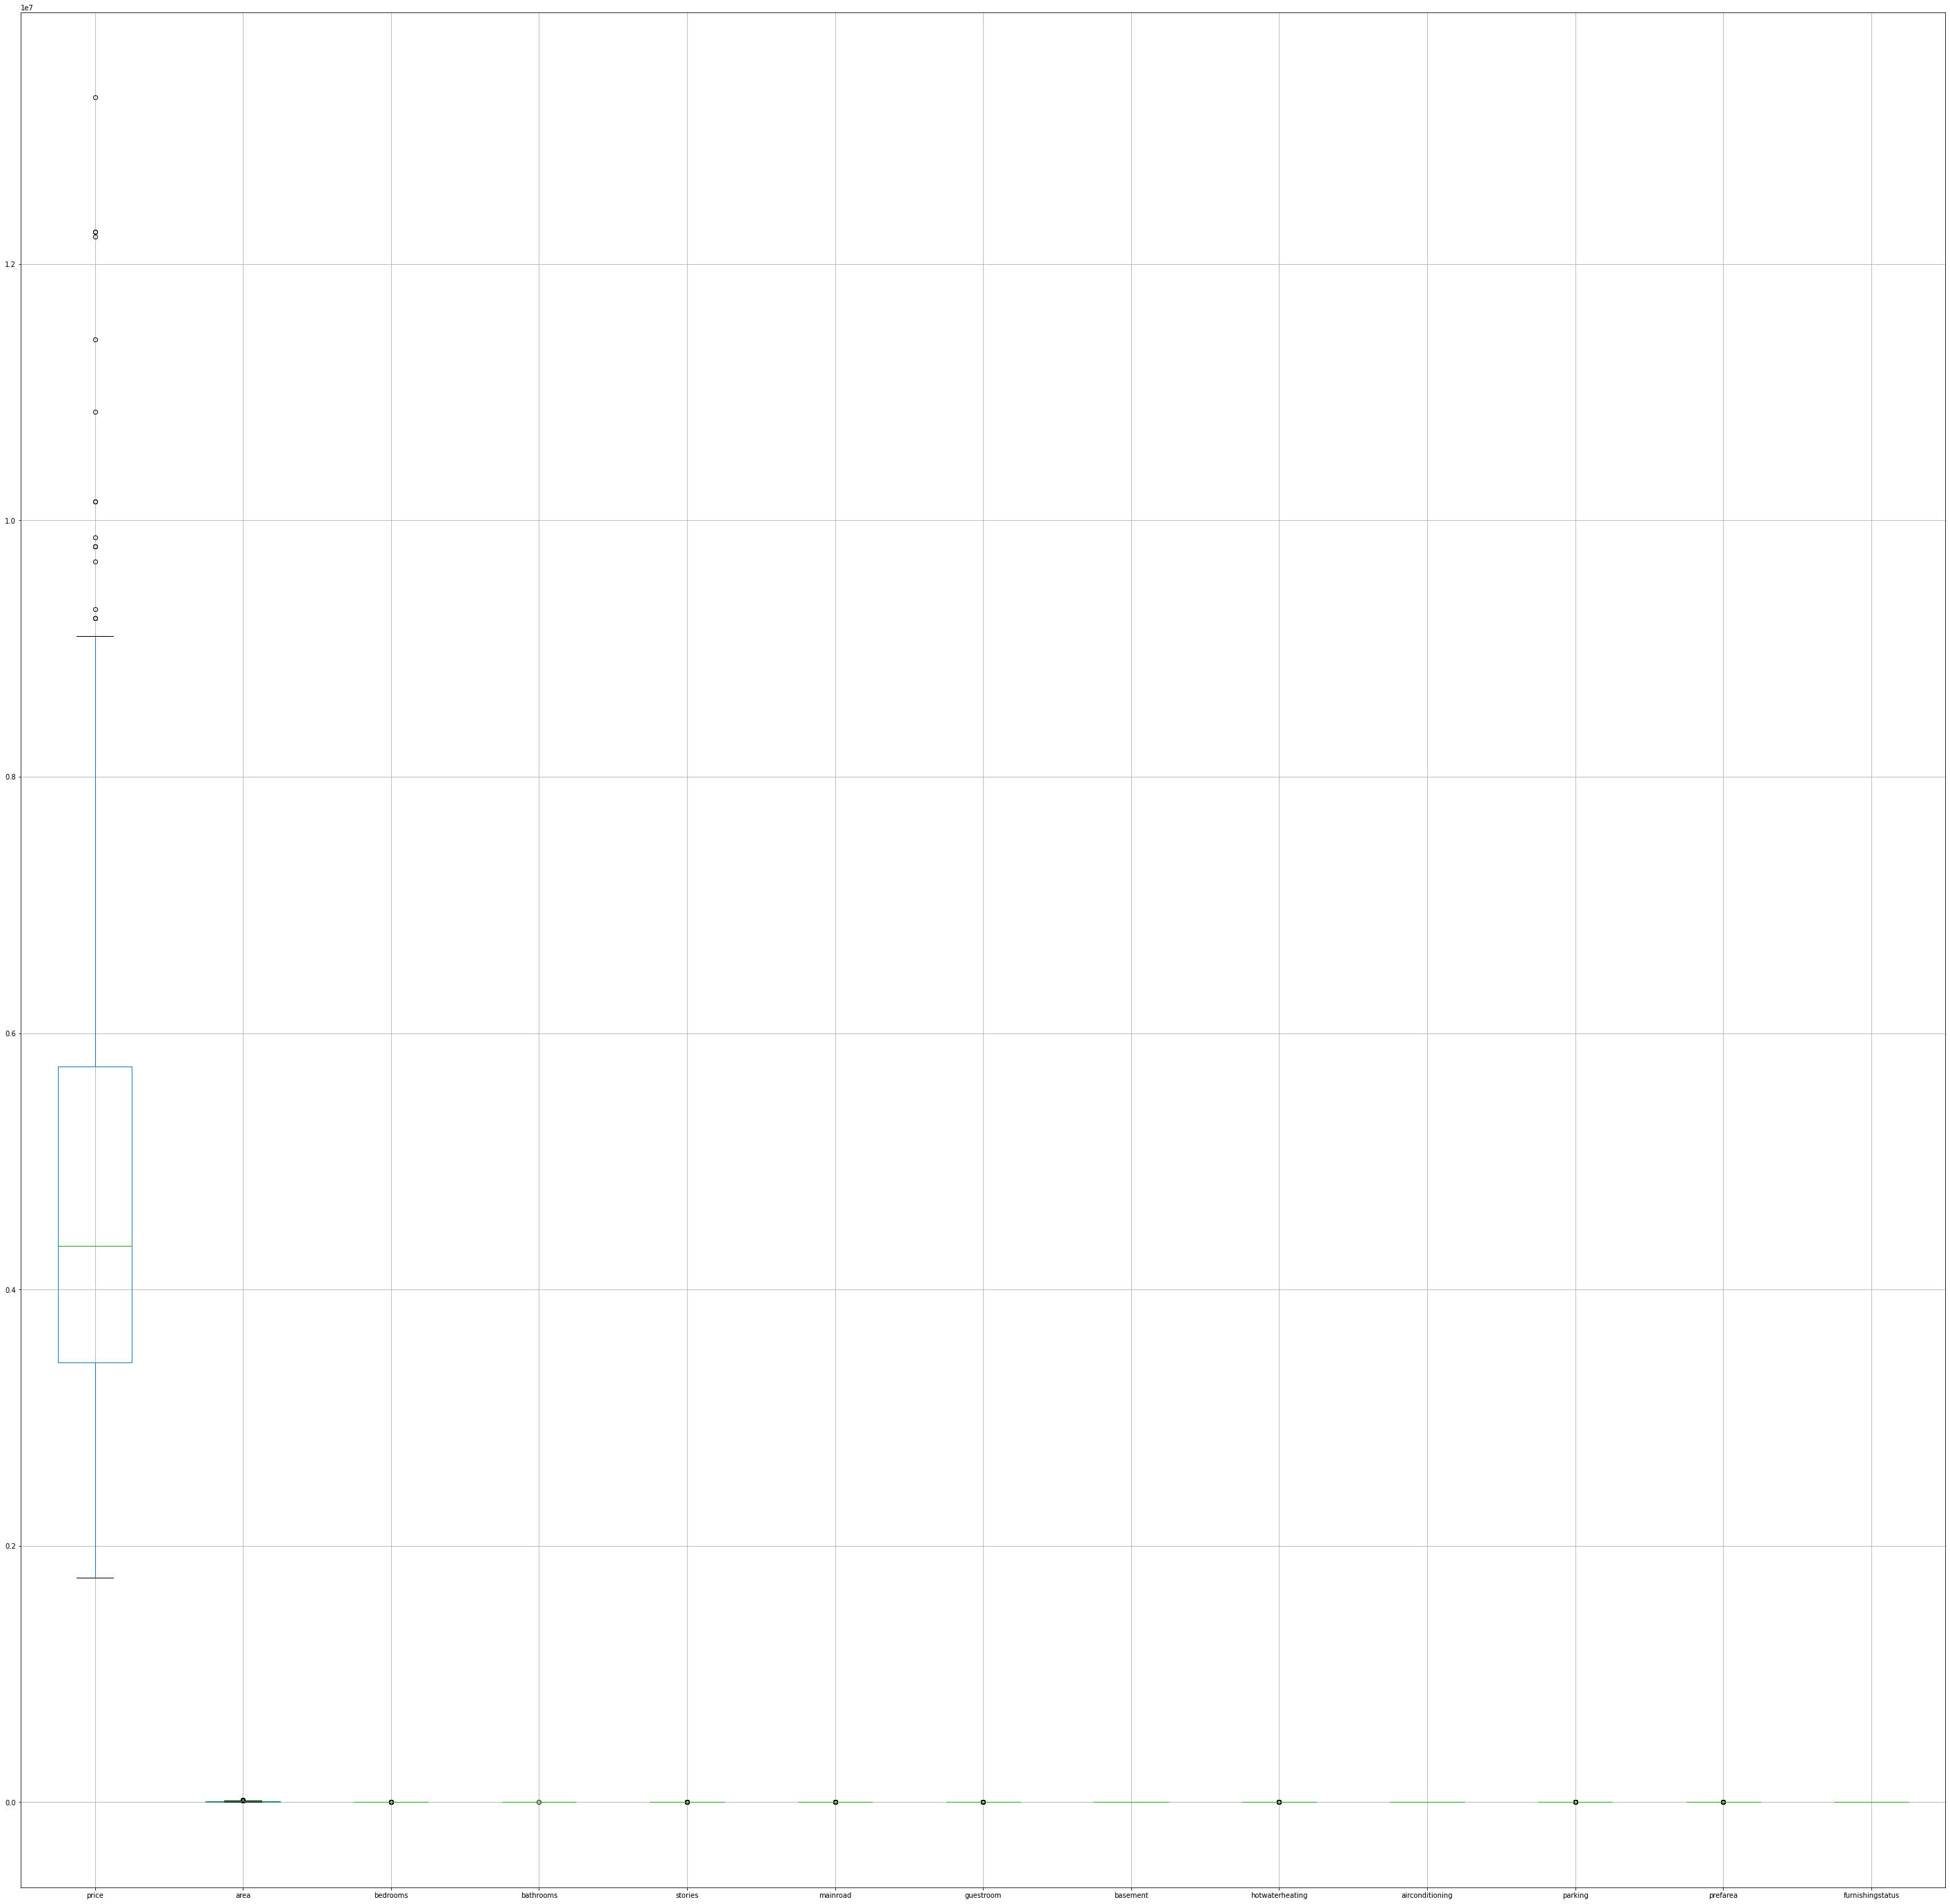

In [58]:
plt.figure(figsize=(50,50))
newdf.boxplot()

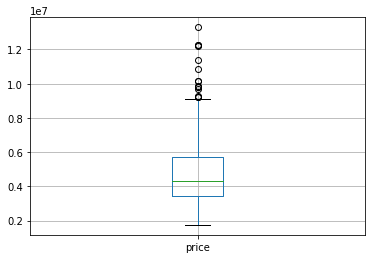

In [59]:
df[['price']].boxplot()

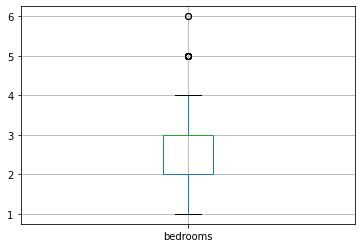

In [60]:
df[['bedrooms']].boxplot()

In [61]:
df.bedrooms.loc[df.bedrooms > 4].sum() # How many values are there where bedrooms is more than 4

62

In [62]:
count = 0
for i in df['bedrooms']:
  if i > 4:
    count+=1
print(count)

12


In [63]:
df.bedrooms.loc[df.bedrooms > 4]

7      5
28     5
34     5
89     5
112    6
143    5
152    5
271    5
340    5
356    5
395    6
536    5
Name: bedrooms, dtype: int64

In [64]:
len(df.bedrooms.loc[df.bedrooms > 4])

12

In [65]:
df.shape

(545, 13)

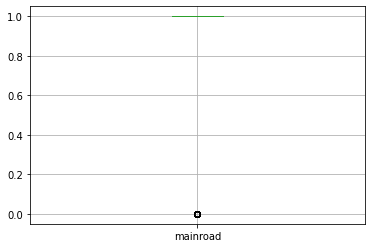

In [66]:
df[['mainroad']].boxplot()

In [67]:
len(df.mainroad.loc[newdf.mainroad == 0])

77

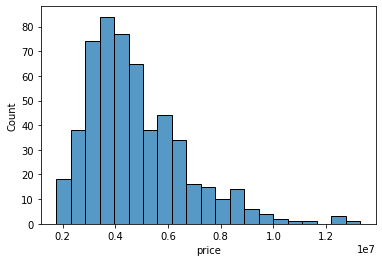

In [68]:
sns.histplot(df.price)

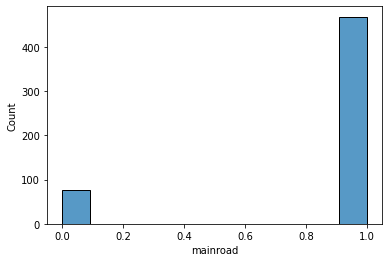

In [69]:
sns.histplot(df.mainroad)

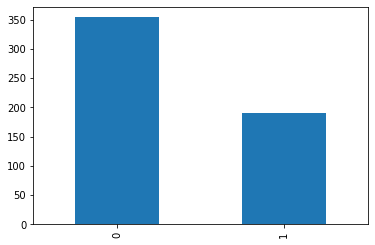

In [70]:
df.basement.value_counts().plot.bar()

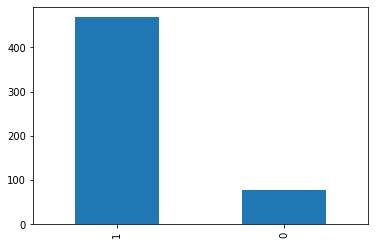

In [71]:
df.mainroad.value_counts().plot.bar()

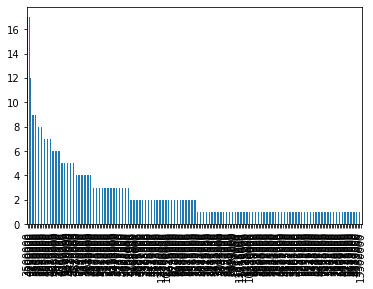

In [72]:
df.price.value_counts().plot.bar()

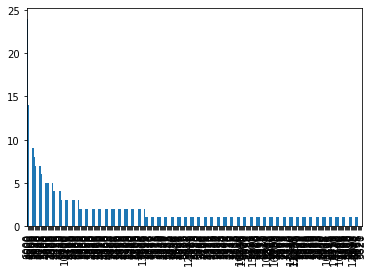

In [73]:
df.area.value_counts().plot.bar()

In [74]:
df.loc[df.bedrooms == 4,['price','bedrooms','bathrooms']][df.bathrooms ==2] # what is the price of house where bedrooms is 4 and bathrooms is 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,price,bedrooms,bathrooms
0,13300000,4,2
3,12215000,4,2
12,9310000,4,2
13,9240000,4,2
16,9100000,4,2
25,8540000,4,2
29,8400000,4,2
32,8295000,4,2
37,7980000,4,2
39,7910000,4,2


#Splitting The Dataset

In [75]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1


In [76]:
df[df.columns[1:]] #df.drop('price' , axis=1)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,1
1,8960,4,4,4,1,0,0,0,1,3,0,1
2,9960,3,2,2,1,0,1,0,0,2,1,2
3,7500,4,2,2,1,0,1,0,1,3,1,1
4,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,0,2
542,3620,2,1,1,1,0,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0,1


In [77]:
df['price']

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [78]:
df.price

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [79]:
df.price.ndim

1

In [80]:
df.drop('price' , axis=1).ndim

2

In [81]:
x = df.drop('price' , axis=1)
y = df.price

In [82]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [83]:
len(x_train )

436

In [84]:
len(x_test)

109

In [85]:
len(y_train)

436

In [86]:
len(y_test)

109

# Choosing The Model

In [87]:
model = LinearRegression()

# Train The Model

In [88]:
model.fit(x_train ,y_train)

LinearRegression()

In [89]:
model.intercept_ #Intercept the value

-153020.39767693914

In [90]:
model.coef_ #coefficient the value

array([2.37359519e+02, 7.42382082e+04, 1.09878563e+06, 4.22818367e+05,
       3.99602240e+05, 2.36368961e+05, 4.13764911e+05, 6.96228583e+05,
       8.14587673e+05, 2.37846833e+05, 6.34405791e+05, 1.26914419e+05])

# Prediction

In [91]:
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

In [92]:
pred_y = model.predict(x_test)

In [93]:
pred_y

array([5239173.32762718, 7054067.57583383, 3129423.54574214,
       4668932.93211896, 3057758.57376511, 3585956.42796038,
       5430399.31975463, 6182620.74176088, 2760320.64728725,
       2359083.3399644 , 9746225.66150697, 2850434.59951216,
       3214625.09528042, 3417524.84438337, 3769801.02852143,
       5309671.85335955, 3068028.49401721, 4890310.44714619,
       4453883.75758458, 3594648.20323524, 5899893.81059038,
       5963835.34944124, 2782787.13656036, 4838071.49471231,
       5330250.73959906, 7654298.46783181, 3300237.03688317,
       5001631.29984533, 8012230.93813927, 3178473.5945452 ,
       6578529.7401813 , 3392127.35949438, 6537350.98622346,
       4237680.88295261, 3621348.73870717, 5910621.58319738,
       4896147.52750411, 4471112.88912377, 3231897.01884388,
       4375178.05890928, 4614551.92546614, 3592864.97825681,
       7035078.81430349, 3775390.05875499, 3772667.84258209,
       4365957.52699338, 6850714.81147478, 4080980.87392741,
       3827406.38024767,

In [94]:
newdf = pd.DataFrame({"Actual Value":y_test , "Predicted value":pred_y})

In [95]:
newdf

,Actual Value,Predicted value
316,4060000,5.239173e+06
77,6650000,7.054068e+06
360,3710000,3.129424e+06
90,6440000,4.668933e+06
493,2800000,3.057759e+06
...,...,...
15,9100000,5.055402e+06
357,3773000,4.098018e+06
39,7910000,7.162800e+06
54,7350000,6.479294e+06


Text(0.5, 1.0, 'Actual Value v/s Predicted Value')

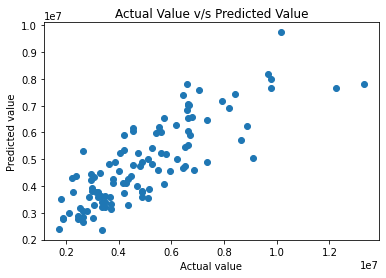

In [96]:
plt.scatter(newdf['Actual Value'],newdf['Predicted value'])
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual Value v/s Predicted Value')

In [97]:
newdf.corr()

,Actual Value,Predicted value
Actual Value,1.000000,0.822513
Predicted value,0.822513,1.000000


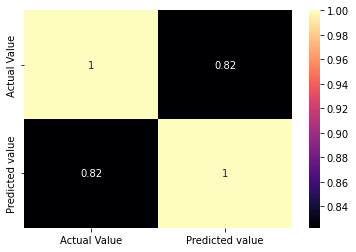

In [98]:
sns.heatmap(newdf.corr() , annot=True , cmap='magma')

In [99]:
x_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,5900,4,2,2,0,0,1,0,0,1,0,0
77,6500,3,2,3,1,0,0,0,1,0,1,1
360,4040,2,1,1,1,0,0,0,0,0,0,2
90,5000,3,1,2,1,0,0,0,1,0,0,2
493,3960,3,1,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15,6000,4,1,2,1,0,1,0,0,2,0,2
357,6930,4,1,2,0,0,0,0,0,1,0,1
39,6000,4,2,4,1,0,0,0,1,1,0,2
54,6000,3,2,2,1,1,0,0,1,1,0,2


In [100]:
x_test.area

316    5900
77     6500
360    4040
90     5000
493    3960
       ... 
15     6000
357    6930
39     6000
54     6000
155    6100
Name: area, Length: 109, dtype: int64

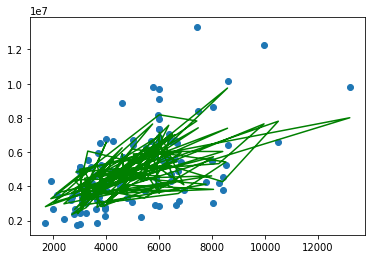

In [101]:
#Simple Linear Regression
plt.scatter(x_test.area,y_test)
plt.plot(x_test.area,pred_y,color='green')

In [ ]:
a = int(input("Enter the area:"))

# Testing The Model

In [102]:
r2_score(y_test,pred_y)

0.6542221839581839